# Random Forests

In [4]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Loans Encoded Data

In [5]:
# Loading data
file_path = Path("../Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()



,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [6]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()



,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [ ]:
'''''''
ravel function

Return a contiguous flattened array. A 1-D array, containing the elements of the input, is returned. The returned array will have the same type as the input array
returns a view of the original array whenever possible. This isn't visible in the printed output, but if you modify the array returned by ravel, it may modify the entries in the original array.

'''''''

In [8]:
# Define target vector
y = df_loans["bad"].ravel()
y[:5]



array([0, 0, 0, 0, 0], dtype=int64)

In [9]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [10]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [11]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)



In [21]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Random Forest Model

In [22]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)


In [ ]:
''''''

    n_estimators: This is the number of random forest to be created by the algorithm. In general, a higher number makes the predictions stronger & more stable.
                however, a very large number can result in higher training time.
                a good approach is to start low & increase the number if the model performance isn't adequate.
                a range between 64 & 128 trees in a forest could be used for initial modeling.
                
    random_state: This parameter defines the seed used by the random number generator. It is important to define a random state when comparing multiple models.
        
''''''''

In [24]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)


## Making Predictions Using the Decsion Tree Model

In [25]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)


## Model Evaluation

In [16]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [17]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,26,15


Accuracy Score : 0.52
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.60      0.62        84
           1       0.31      0.37      0.33        41

    accuracy                           0.52       125
   macro avg       0.48      0.48      0.48       125
weighted avg       0.54      0.52      0.53       125



## Feature Importance

In [18]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

''''''
A byproduct of the random forest algorithm is a ranking of feature importance 
which features have the most impact on the decision.

''''''

In [19]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


[(0.42871537959784756, 'age'),
 (0.322909180511852, 'month_num'),
 (0.08373400008559587, 'term'),
 (0.054795639837519644, 'amount'),
 (0.023826066130178958, 'education_High School or Below'),
 (0.023805501611235368, 'education_college'),
 (0.020274246776222464, 'gender_male'),
 (0.01986699331709372, 'education_Bachelor'),
 (0.019479294982300867, 'gender_female'),
 (0.0025936971501533874, 'education_Master or Above')]

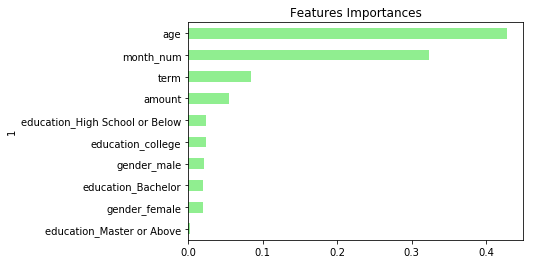

In [20]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

